                                   count        mean         std   min  \
topic_target                                                             
ARTS CULTURE ENTERTAINMENT         117.0  178.803419  108.835231  20.0   
BIOGRAPHIES PERSONALITIES PEOPLE   167.0  185.311377  101.385814  34.0   
DEFENCE                            258.0  186.344961   89.174125  23.0   
DOMESTIC MARKETS                   133.0  129.345865   80.836540  18.0   
FOREX MARKETS                      845.0  136.029586  104.188322  13.0   
HEALTH                             183.0  162.688525   82.810363  25.0   
IRRELEVANT                        4734.0  125.294043   98.816131   8.0   
MONEY MARKETS                     1673.0  110.899582   92.838296  13.0   
SCIENCE AND TECHNOLOGY              70.0  164.242857   77.396483  49.0   
SHARE LISTINGS                     218.0   95.389908   79.247784  14.0   
SPORTS                            1102.0  127.389292   99.886275  12.0   

                                     

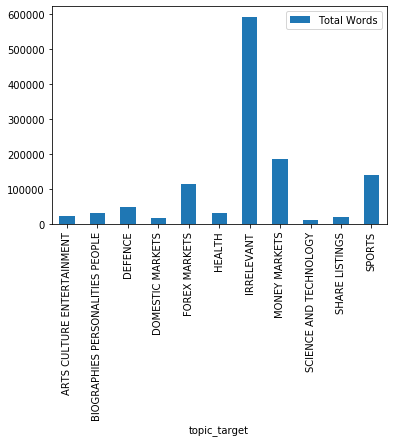

In [30]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from itertools import chain

def load_dataset(csv_file):
    #import the file and convert it into a dataframe
    data = pd.read_csv(csv_file)
    return data

def unionise_train_test(train,test):
    train['Categorise'] = 'Training'
    test['Categorise'] = 'Test'
    unionised_data = pd.concat([train,test],ignore_index=True)
    display(unionised_data)
    return unionised_data
    

def split_words(data):
    res = data['article_words'].str.split(',').apply(pd.value_counts)
    res = res.fillna(0)
    #cols = [col for col in res.columns]
    #display(cols)
    return res

def get_word_list(data):
    #We will need to consider the most popular words. However this might mean it might not be applicable for some articles
    counter = pd.Series(np.concatenate([x.split(',') for x in data['article_words']])).value_counts()
    word_list = counter.index.tolist()
    return word_list


def combine_with_target(data_left, data_right):

    merge_data = pd.merge(data_left, data_right, left_index=True, right_index=True)
    del merge_data['article_words']
    del merge_data['article_number']
    merge_data.rename(columns={"topic_x": "topic", "topic_y": "topic_target"},inplace = True)
    
    return merge_data



def keywords_by_topic(data):
    #We will need to consider the most popular words. However this might mean it might not be applicable for some articles
    counter = pd.Series(np.concatenate([x.split(',') for x in data['article_words']])).value_counts()
    word_list = counter.index.tolist()
    counter_data = counter.to_frame(name='counter')
    counter_data.reset_index(inplace = True)
    top20 = counter_data[:50]
    display(top20)
    
    plt.bar(top20['index'], top20['counter'], align='center', alpha=0.5)
    plt.ylabel('Number of words')
    plt.title('Top 20 words in the test set')
    plt.xticks(rotation=45, ha="right")
    plt.show()

def sum_by_topic(data,wordlist):
    data['Total Words'] = data[wordlist].sum(axis=1)
    table = pd.pivot_table(data, values=['Total Words'], index=['topic_target'],
                     aggfunc=np.sum)
    table.plot(kind='bar')
    print(data.groupby('topic_target')['Total Words'].describe())
    

if __name__ == "__main__":
    ##Load up the training set and test set
    training = load_dataset('training.csv')
    test = load_dataset('test.csv')
    Unionise the dataset
    unionised_dataset = unionise_train_test(training,test)
    ###get all words from the unionised dataset
    training_words = get_word_list(training)
    keywords_by_topic(test)
    word_count_training = split_words(training)
    merged_data = combine_with_target(word_count_training,training)
    display(merged_data)
    sum_by_topic(merged_data,training_words)
    

    
    